In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from modules.my_spark_linear_regression import *
from modules.my_pyspark import *

In [3]:
spark = MyPySpark(session=True, sql=True)

In [4]:
file_data = r'./data/Ecommerce_Customers.csv'

In [5]:
data = spark.readFile(file_data)


In [6]:
input_features = [
    'Avg Session Length',
    'Time on App',
    'Time on Website',
    'Length of Membership'
]

output_feature = 'Yearly Amount Spent'

In [7]:
lr_model = MySparkLinearRegression(data, input_features, output_feature)

In [8]:
lr_model.prepareData()

In [9]:
lr_model.trainTestSplit()

In [10]:
lr_model.describeTarget()

+-------+---------------------------+--------------------------+
|summary|Yearly Amount Spent (train)|Yearly Amount Spent (test)|
+-------+---------------------------+--------------------------+
|  count|                        370|                       130|
|   mean|         500.01188817513963|         497.3278500345674|
| stddev|          78.41431089671289|         82.10055700065234|
|    min|         256.67058229005585|        302.18954780965197|
|    max|          765.5184619388373|         712.3963268096637|
+-------+---------------------------+--------------------------+



In [11]:
lr_model.buildModel()

In [12]:
metric, residual = lr_model.evaluate()

In [13]:
metric

,Metric,Value
0,MAE,8.176808
1,MSE,106.638804
2,RMSE,10.326607
3,R-SQUARED,0.984057


In [14]:
residual.describe().show()

+-------+-------------------+
|summary|          residuals|
+-------+-------------------+
|  count|                130|
|   mean| 0.5942259302911181|
| stddev| 10.349377732997825|
|    min|-27.321590436105566|
|    max|  30.53411783655116|
+-------+-------------------+



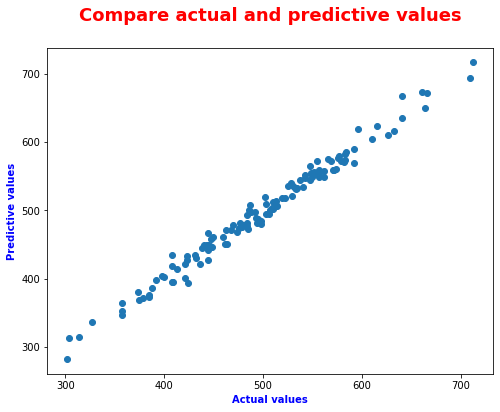

In [15]:
test_predict = lr_model.evaluateTestData(True)

In [16]:
test_predict.select(output_feature, 'predict_' + output_feature).show()

+-------------------+---------------------------+
|Yearly Amount Spent|predict_Yearly Amount Spent|
+-------------------+---------------------------+
|  461.7807421962299|          450.7415253922152|
|  467.5019004269896|         471.31826755422935|
|  494.6386097568927|         487.52657770298674|
| 448.93329320767435|          461.5954050524224|
|  486.9470538397658|         508.07437288679057|
|  421.3266312569514|          421.8559016146703|
|  423.4705331738239|         426.51928047900833|
|  591.7810894256675|          569.6674069835253|
|  530.7667186547619|           535.039204819801|
|  443.9656268098819|         449.26288494063465|
| 444.54554965110816|          426.8691281813042|
|  503.3878872879605|          509.3533487433722|
| 446.41867337013565|          447.9027967658742|
|  440.0027475469415|          449.2329344745274|
|   459.285123462352|          461.6098508523555|
|  556.2981411740467|          558.4819592289941|
|  392.2852442462675|         397.50514358130613|


In [17]:
save_path = "./models/Ecommerce_Customers_LinearRegression_1"

In [18]:
lr_model.saveModel(save_path)

In [19]:
lr_model_load = mySparkLinearRegressionLoadModel(save_path)

In [20]:
test_predict_load = lr_model_load.transform(lr_model.test_data.select('features'))

In [21]:
test_predict_load.show()

+--------------------+---------------------------+
|            features|predict_Yearly Amount Spent|
+--------------------+---------------------------+
|[30.7377203726281...|          450.7415253922152|
|[30.8364326747734...|         471.31826755422935|
|[30.9716756438877...|         487.52657770298674|
|[31.0662181616375...|          461.5954050524224|
|[31.1239743499119...|         508.07437288679057|
|[31.2606468698795...|          421.8559016146703|
|[31.2681042107507...|         426.51928047900833|
|[31.2834474760581...|          569.6674069835253|
|[31.4252268808548...|           535.039204819801|
|[31.5257524169682...|         449.26288494063465|
|[31.6098395733896...|          426.8691281813042|
|[31.7242025238451...|          509.3533487433722|
|[31.8186165667690...|          447.9027967658742|
|[31.8279790554652...|          449.2329344745274|
|[31.8530748017465...|          461.6098508523555|
|[31.8627411090001...|          558.4819592289941|
|[31.8745516945853...|         